In [4]:
from scipy.stats import binom
n = 3
p = 0.5
k = 1

binom.pmf(k,n,p)



0.37500000000000033

In [5]:
import numpy as np
ks = np.arange(n+1)
ps = binom.pmf(ks,n,p)
ps

array([0.125, 0.375, 0.375, 0.125])

In [6]:
from empiricaldist import Pmf
pmf_k = Pmf(ps,ks)
pmf_k

,probs
0,0.125
1,0.375
2,0.375
3,0.125


<Axes: >

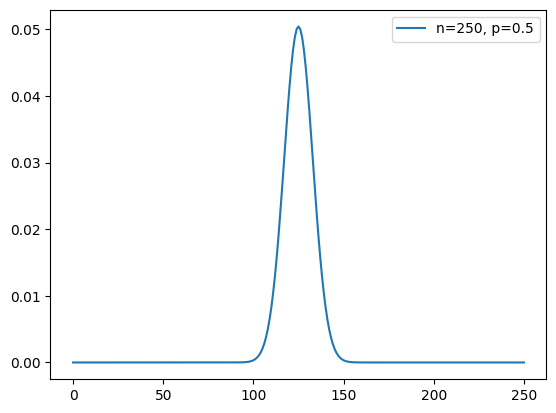

In [10]:
def make_binomial(n,p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks,n,p)
    return Pmf(ps,ks)
pmf_k = make_binomial(250,0.5)
pmf_k.plot(legend=True, label='n=250, p=0.5')

In [13]:
pmf_k[140]
def prob_ge(pmf, threshold):
    ge = (pmf.qs >= threshold)
    total = pmf.ps[ge]
    return total.sum()

prob_ge(pmf_k, 140)

0.033210575620021665

<Axes: >

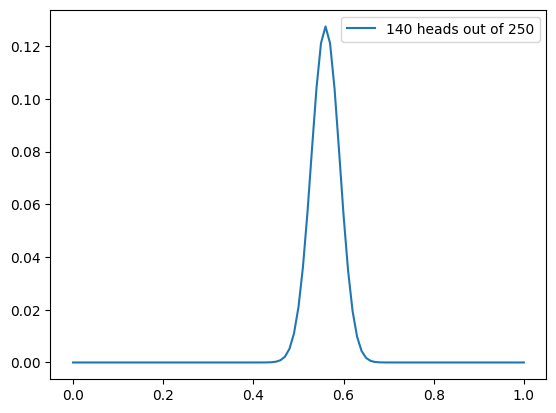

In [17]:
hypos = np.linspace(0,1,101)
prior = Pmf(1, hypos)

likelihood_heads = hypos
likelihood_tails = 1 - hypos

likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}
dataset = 'H' * 140 + 'T' * 110

def update_euro(pmf, dataset):
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

posterior = prior.copy()
update_euro(posterior, dataset)

posterior.plot(legend=True, label='140 heads out of 250')